In [31]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import librosa

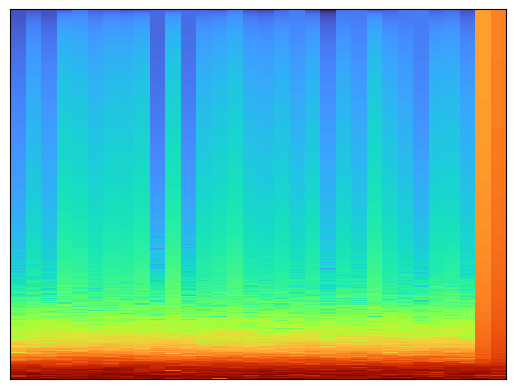

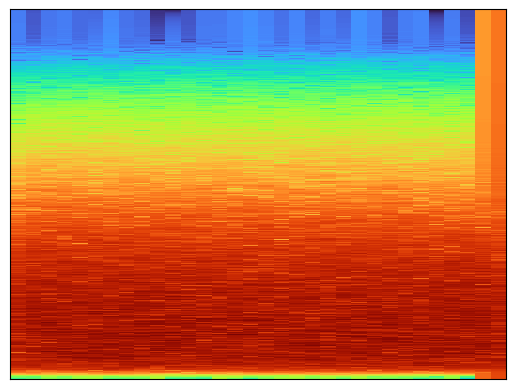

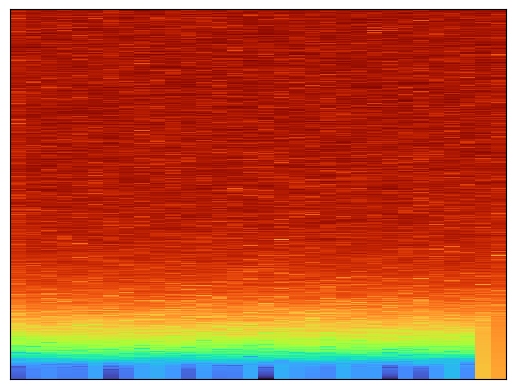

In [34]:
fs = 16000
x = np.random.randn(fs)

eq_cutoff = [250, 2500]

bands = [0] + eq_cutoff + [fs / 2]
for fa, fb in zip(bands, bands[1:]):
    sos = []
    if fa != 0:
        sosa = scipy.signal.bessel(8, fa, fs=fs, btype="highpass", output="sos")
        sos.append(sosa)
    if fb != fs / 2:
        sosb = scipy.signal.bessel(8, fb, fs=fs, btype="lowpass", output="sos")
        sos.append(sosb)

    sos = np.vstack(sos)
    y = scipy.signal.sosfilt(sos, x)
    librosa.display.specshow(20*np.log10(np.abs(librosa.stft(y))), cmap="turbo")
    plt.show()